In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

## Business and Data Understanding
- How should you start to host on Airbnb?
- How should you prepare your room?
- Which type of cancellation policy is mostly used?

I will be using the Airbnb data to get some insight into each of these questions.

# Data Preparation

In [3]:
#This function will assist to retrieve columns with greater than percent of missing values function
def drop_columns_rows(df, percent_missing_value):
    '''
    INPUT:
    df - the pandas dataframe of listings.csv file
    percent_missing_value - the missing percentage amount of dataframe
    
    OUTPUT:
    column_names - column names with with greater than percent_missing_value
    '''
    #Drop rows with all missing values
    df = df.dropna(how='all', axis=0)
    column_names = df[df.columns
                   [df.isnull().mean() > percent_missing_value]]
    return column_names


In [4]:
def sum_columns_values(dataframe_name):
    sum_columns_value = dataframe_name.sum(axis=0)
    return sum_columns_value

In [5]:
def sum_row_values(dataframe_name):
    sum_row_values = dataframe_name.sum(axis=1)
    return sum_row_values

In [6]:
listings_df = pd.read_csv("./listings.csv")

We need to clean data

In [7]:
#A column with greater than 90 percent missing value is a reason to drop it
#In my opinion, a row with all null value of columns has no value to predict model
#Drop missing coloumns with 90 percent missing value and rows with missing all values 
listings_df.drop(columns = drop_columns_rows(listings_df,0.9) , inplace=True)
remove_char_list = ['$',',']
for remove_char in remove_char_list:
    listings_df['weekly_price'] = listings_df['weekly_price'].str.replace(remove_char,'')
    listings_df['monthly_price'] = listings_df['monthly_price'].str.replace(remove_char,'')
    listings_df['price'] = listings_df['price'].str.replace(remove_char,'')
listings_df['weekly_price'] = listings_df['weekly_price'].astype(float)
listings_df['monthly_price'] = listings_df['monthly_price'].astype(float)
listings_df['price'] = listings_df['price'].astype(float)

In [8]:
room_type_set = set(listings_df['room_type'])

In [9]:
entire_home_df = listings_df.query("room_type=='Entire home/apt'")['reviews_per_month']

In [10]:
private_home_df = listings_df.query("room_type=='Private room'")['reviews_per_month']

In [11]:
shared_home_df = listings_df.query("room_type=='Shared room'")['reviews_per_month']

 ## 1. How do you start to host on Airbnb?

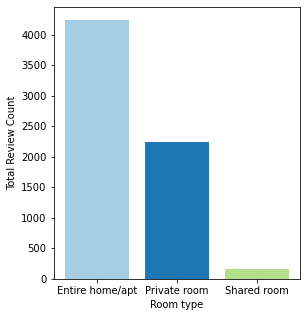

In [12]:
#Make a plot by room_type with their total review count
plt.figure(figsize=(15,5))
plt.subplot(132)
plt.xlabel('Room type')
plt.ylabel('Total Review Count')
list_room_type_df = ['Entire home/apt','Private room','Shared room']
list_reviews_total = [sum_columns_values(entire_home_df),
                      sum_columns_values(private_home_df),
                      sum_columns_values(shared_home_df)]
plt.bar(list_room_type_df,list_reviews_total,color=plt.cm.Paired(np.arange(len(list_room_type_df))))
plt.show()

As shown above in the bar chart, room type - 'Entire home/apt' got the highest total review count and room type - 'Shared room' got the lowest total review count. 

## 2. How should you prepare your room?

In [13]:
#a panda series of the counts for each bed type 
bed_type_valus = listings_df.bed_type.value_counts()

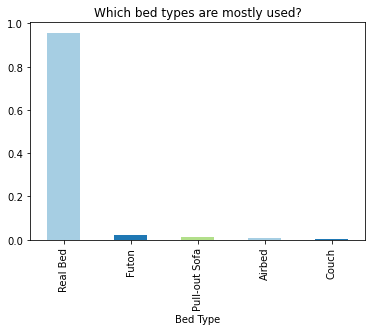

In [14]:
#The bar chart describe the proportion of individuals in bed_type_valus
plt.xlabel('Bed Type')
(bed_type_valus/listings_df.shape[0]).plot(kind="bar",color=plt.cm.Paired(np.arange(len(list_room_type_df))));
plt.title("Which bed types are mostly used?");

As shown above in the bar chart, bed type - 'Real Bed' is the mostly used to prepare their rooms.

## 3. Which type of cancellation policy is mostly used?

In [15]:
#a panda series of the counts for each cancellation policy
cancellation_policy_type_valus = listings_df.cancellation_policy.value_counts()

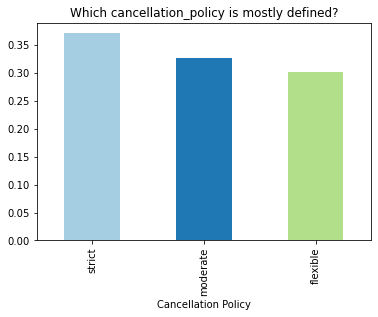

In [16]:
#The bar chart describe the proportion of individuals in cancellation_policy_type_valus
plt.xlabel('Cancellation Policy')
(cancellation_policy_type_valus/listings_df.shape[0]).plot(kind="bar",color=plt.cm.Paired(np.arange(len(list_room_type_df))));
plt.title("Which cancellation_policy is mostly defined?");

As shown above in the bar chart, cancellation Policy - 'strict' is the mostly defined.

# 3. Data Modeling

In [17]:
#Only use price variables
num_vars = listings_df[['price','weekly_price','monthly_price']]
# Mean function 
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = num_vars.apply(fill_mean, axis = 0)
X = fill_df[['weekly_price','monthly_price']]
y = fill_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
r2_test = r2_score(y_test, y_test_preds)
print(r2_test)

0.36393940886893106


In [20]:
#Only use price variables
num_vars = listings_df[['price','weekly_price','monthly_price']]
# Mean function 
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = num_vars.apply(fill_mean, axis = 0)
X = fill_df[['weekly_price','monthly_price']]
y = fill_df['price']
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
#Instantiate
lm_model = LinearRegression(normalize=True)
#Fit
lm_model.fit(X_train, y_train)
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Score using your model
r2_price_test = r2_score(y_test, y_test_preds)
r2_price_train = r2_score(y_train, y_train_preds)
print(r2_price_test)
print("After test")
print(r2_price_train)

0.36393940886893106
After test
0.406152320077684


In [19]:
fill_df.shape[1]

3